# <center> Unidad 5: Forecasting </center>


## Descripción
En esta lección revisaremos los modelos de **forecasting**, una herramienta muy útil en los negocios. El **forecasting**, o pronóstico, es una técnica que permite prever el comportamiento futuro de los negocios a partir del análisis de datos pasados y presentes. Esta herramienta se utiliza cada vez más en las empresas, ya que permite tomar decisiones informadas y anticiparse a posibles situaciones futuras.

El uso del **forecasting** en los negocios puede tener varios beneficios, tales como: ofrecer parámetros del comportamiento esperado de las ventas en el futuro, permitir planear la producción y administrar el reabastecimiento de insumos, ayudar a optimizar la toma de decisiones y mejorar el flujo de información en la cadena de suministro, entre otros.

Para implementar modelos de **forecasting** en una empresa, es necesario utilizar diferentes herramientas, como los datos históricos de venta, las previsiones del equipo de ventas y del departamento de marketing, así como cualquier otra información que sea útil para obtener la cifra más real posible. Además, existen varias herramientas comerciales de forecasting, como la de HubSpot, que permiten elaborar un pronóstico personalizado del mes o trimestre y enviarlo al equipo de liderazgo para ofrecer una visión general sobre cómo pronostican que terminará el período.

# Caso práctico

Este material expande el marco inicial del forecasting y aborda la temática en un contexto del análisis y resolución de un caso práctico con Python. Tiene por objetivo analizar las técnicas de forecasting y su aplicabilidad como una herramientas una herramienta esencial en los negocios que puede ayudar a las empresas a tomar decisiones informadas y planificar su futuro en base a datos concretos.

💡 _**Nota**_: _Este material ha sido preparado por la **Universidad de las Américas - UDLA**. Parte del contenido ha sido adaptado a partir de material público liberado en [Kaggle](kaggle.com), [Datacamp](datacamp.com) y otros sitios web._

# Sobre la empresa

**Blue Airways** es una aerolínea de origen australiano que se dedica al transporte comercial de pasajeros. En la últioma decada, se ha posicionado como la principal aerolínea del continente oceánico, y una de las empresas líderes del mundo, realizando vuelos tanto nacionales como internacionales. De esta forma, con su red de vuelos unía los distintos estados del país, y llegaba también a otros continentes como América, Europa y Asia.

Sus orígenes se remontan a 1929, cuando el gobierno australiano estableció una línea aérea para transportar pasajeros y correo. De esta forma, dio origen a uno de los primeros emprendimientos aerocomerciales de la región.  El objetivo era contar con medios rápidos de comunicación entre el interior del país y las grandes ciudades.

# 1. Evaluación de necesidades del negocio
La fase de evaluación del caso de negocio requiere que se cree, evalúe y apruebe un caso de negocio antes de proceder a las tareas reales de análisis práctico.

La industria del transporte aéreo se enfrenta a uno de sus mayores retos desde sus inicios.  El incremento de cancelaciones y disminución de rutas ha provocado que los ingresos **Blue Airways** caigan drasticamente. El área de Revenue Management se ha planteado como meta pronosticar sus ventas de manera que puedan anticiparse a diferentes escenarios. Para lograr este propósito, los científicos de datos de la aerolínea han recolectado información de varios años como principal insumo para generar modelos de **forecasting**.

# 2. Identificación de datos
La etapa de identificación de datos consiste en identificar los conjuntos de datos necesarios para el proyecto de análisis y sus fuentes.

**Dataset:** 

El conjunto de datos proporciona los totales mensuales de pasajeros de **Blue Airways** desde el año 1949 a 1960. 

**Diccionario de datos**

  * `Month`: fecha de viaje
  * `#Passengers`: número de pasajeros

# 3. Adquisición y filtrado de datos
Durante la etapa de adquisición y filtrado de datos se recopilan los datos de todas las fuentes de datos que se identificaron durante la etapa Identificación de datos.

El conjunto de datos planteado contiene información sobre el comportamiento de compra de 2.000 individuos de una zona determinada al entrar en una tienda física de productos de gran consumo. Todos los datos se han recogido a través de las tarjetas de fidelización que utilizan en caja. Los datos han sido preprocesados y no faltan valores. Además, el volumen del conjunto de datos se ha restringido y anonimizado para proteger la privacidad de los clientes.

# 4. Extracción de datos
Durante esta etapa se debe extraer datos dispares y transformarlos en un formato que pueda facilitar el análisis de datos.

**Intalación librerías** <a class="anchor" id="3"></a>

In [27]:
#pip install fbprophet

**Carga de librerías**

In [6]:
#from fbprophet import Prophet
#from fbprophet.plot import plot_plotly
#import plotly.offline as py
#py.init_notebook_mode()

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

### **Importar Dataset**

In [36]:
url = "https://raw.githubusercontent.com/vhteran/UDLA_Big_Data_aplicada_a_los_Negocios/main/data/AirPassengers.csv"
df = pd.read_csv(url, sep = ";")

# 5. Validación y limpieza de datos
Los datos no válidos pueden sesgar y falsear los resultados de los análisis. La etapa de validación y depuración de datos se enfoca en establecer reglas de validación a menudo complejas y a eliminar cualquier dato no válido conocido.

**Vista previa Dataset**

In [37]:
display(df)

,"Month,#Passengers"
0,"1949-01,112"
1,"1949-02,118"
2,"1949-03,132"
3,"1949-04,129"
4,"1949-05,121"
...,...
139,"1960-08,606"
140,"1960-09,508"
141,"1960-10,461"
142,"1960-11,390"


In [38]:
#Debemos renombrar el nombre de la columna `#Passengers` a `AirPassengers`
df.rename(columns = {"#Passengers":"AirPassengers"}, inplace = True)
df

,"Month,#Passengers"
0,"1949-01,112"
1,"1949-02,118"
2,"1949-03,132"
3,"1949-04,129"
4,"1949-05,121"
...,...
139,"1960-08,606"
140,"1960-09,508"
141,"1960-10,461"
142,"1960-11,390"


**Resumen de Dataset**



Ahora, vamos a imprimir la información sobre el conjunto de datos que nos dirá acerca de las columnas, tipo de datos de las columnas y si la columna es nula o no nula.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Month,#Passengers  144 non-null    object
dtypes: object(1)
memory usage: 1.2+ KB


- Podemos ver que el conjunto de datos contiene una columna `Month` y `AirPassengers`. 

- La librería **prophet** espera como entrada dataframe con una columna que contiene la información temporal y otra columna que contiene la métrica que deseamos pronosticar. 

- Lo importante a tener en cuenta es que, la columna `Month` debe ser de tipo datetime. Pero, podemos ver que es de tipo de datos `object`. Ahora, debido a que la columna `Month` no es de tipo datetime. Por lo tanto, tendremos que convertirlo en tipo datetime.

In [9]:
df['Month'] = pd.DatetimeIndex(df['Month'])
df.dtypes

Month            datetime64[ns]
AirPassengers             int64
dtype: object

Ahora podemos ver que nuestra columna `Month` es del tipo datetime correcto

- Prophet también impone la estricta condición de que las columnas de entrada deben denominarse **ds (la columna de tiempo)** e **y (la columna métrica)**. 

- Ahora, debemos cambiar el nombre de las columnas de nuestro marco de datos.

In [10]:
df = df.rename(columns={'Month': 'ds',
                        'AirPassengers': 'y'})

df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


Podemos ver que los nombres de las columnas se renombran.

# 6. Agregación y representación de datos
La etapa de agregación y representación de datos, se dedica a integrar múltiples conjuntos de datos para obtener una visión unificada.

Este caso de uso no requiere la integración de otros datos.

**Visualización de datos**

Ahora bien, se considera una buena práctica visualizar los datos que tenemos a mano. Así que vamos a trazar nuestros datos de series temporales:

# 7. Análisis de datos
La etapa de análisis de datos se enfoca en llevar a cabo la tarea de análisis propiamente dicha, que suele implicar uno o más tipos de análisis

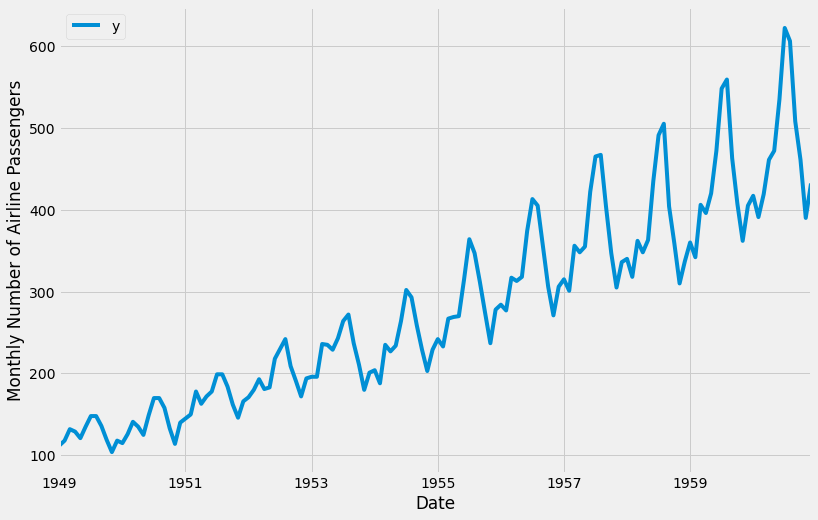

In [11]:
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Monthly Number of Airline Passengers')
ax.set_xlabel('Date')

plt.show()

Ahora, nuestro dataset está preparado y estamos listos para utilizar la biblioteca Prophet para producir previsiones de nuestras series temporales.

# **Implementación modelo de forecasting** <a class="anchor" id="6"></a>

Prophet es una librería de forecasting desarrollada por Facebook, es muy fácil de usar y da buenos resultados para series de tiempo con un patrón estacionalidad y tendencia.

- A continuación, describiremos cómo utilizar la biblioteca Prophet para predecir los valores futuros de nuestros datos de series temporales. 

- Para empezar, debemos instanciar un nuevo objeto Prophet. Prophet nos permite especificar una serie de argumentos. Por ejemplo, podemos especificar el rango deseado de nuestro intervalo de incertidumbre estableciendo el parámetro `ancho de intervalo`.

**Introduction to Prophet** <a class="anchor" id="1"></a>


**Prophet** es un procedimiento de previsión de datos de series temporales basado en un modelo aditivo en el que las tendencias no lineales se ajustan con estacionalidad anual, semanal y diaria, además de efectos de vacaciones. Funciona mejor con series temporales que tienen fuertes efectos estacionales y varias temporadas de datos históricos. Prophet es robusto frente a los datos que faltan y los cambios de tendencia, y suele manejar bien los valores atípicos.


   ***Prophet** es un software de código abierto publicado por el equipo de Data Science de Facebook. Se puede descargar en CRAN y PyPI.*


- **Prophet** descompone los datos de series temporales en tendencia, estacionalidad y efecto vacacional

- **Tendencia** modela los cambios no periódicos en los datos de las series temporales.

- **Estacionalidad** se debe a cambios periódicos como la estacionalidad diaria, semanal o anual.

- **Efecto vacacional** se produce en horarios irregulares a lo largo de un día o un periodo de días.

- **Término de error** es lo que no explica el modelo.

**Ventajas de Prophet** <a class="anchor" id="2"></a>

Prophet tiene varias ventajas asociadas:

- **1. Preciso y rápido** - Prophet es preciso y rápido. Se utiliza en muchas aplicaciones de Facebook para elaborar previsiones fiables para la planificación y el establecimiento de objetivos. 


- **2. Totalmente automático** - Prophet es totalmente automático. Obtendremos una previsión razonable sobre datos desordenados sin esfuerzo manual. 


- **3. Previsiones ajustables** - Prophet elabora previsiones ajustables. Incluye muchas posibilidades para que los usuarios retoquen y ajusten las previsiones. Podemos utilizar parámetros interpretables por el ser humano para mejorar la previsión añadiendo nuestro conocimiento del dominio.


- **4. Disponible en R o Python** - Podemos implementar Prophet en R o Python. 



- **5. Maneja bien las variaciones estacionales** - Prophet se adapta a la estacionalidad con varios periodos.



- **6. Robusto frente a valores atípicos** - Es robusto a los valores atípicos. Elimina los valores atípicos.



- **7. Robusto frente a datos perdidos** - Prophet funciona bien frente a datos perdidos.


In [12]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.95)

Ahora que nuestro modelo Prophet ha sido inicializado, podemos llamar a su método `fit` con nuestro DataFrame como entrada. 


In [13]:
my_model.fit(df)

Para obtener predicciones de nuestras series temporales, debemos proporcionar a Prophet un nuevo DataFrame que contenga una columna `ds` que contenga las fechas para las que queremos predicciones. 

Convenientemente, no tenemos que preocuparnos de crear manualmente este DataFrame, ya que Prophet proporciona la función de ayuda `make_future_dataframe`.


In [14]:
future_dates = my_model.make_future_dataframe(periods=36, freq='MS')
future_dates.head()

,ds
0,1949-01-01
1,1949-02-01
2,1949-03-01
3,1949-04-01
4,1949-05-01


In [15]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,1949-01-01,85.667868,40.711662,130.242936
1,1949-02-01,79.176553,35.772575,124.991217
2,1949-03-01,110.839332,69.379890,155.182425
3,1949-04-01,108.472210,67.188442,153.991365
4,1949-05-01,111.854130,69.954869,157.146512


Prophet también proporciona una práctica función para trazar rápidamente los resultados de nuestras previsiones, como se indica a continuación

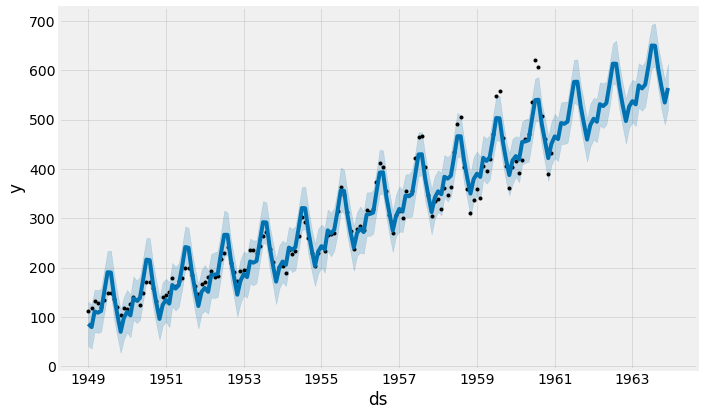

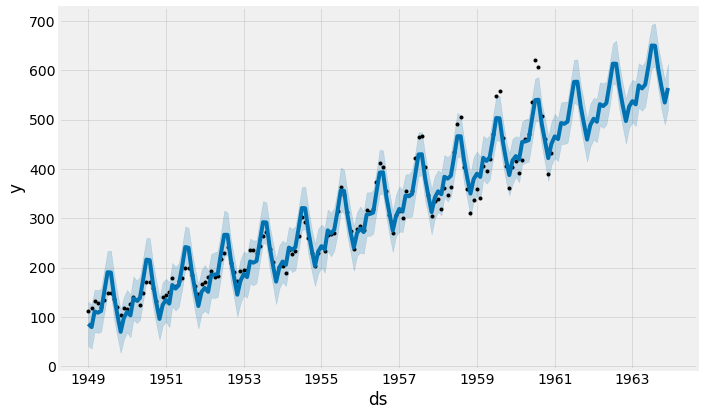

In [16]:
my_model.plot(forecast, uncertainty=True)

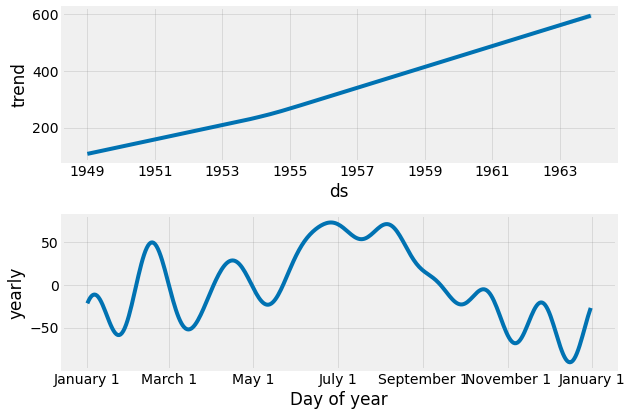

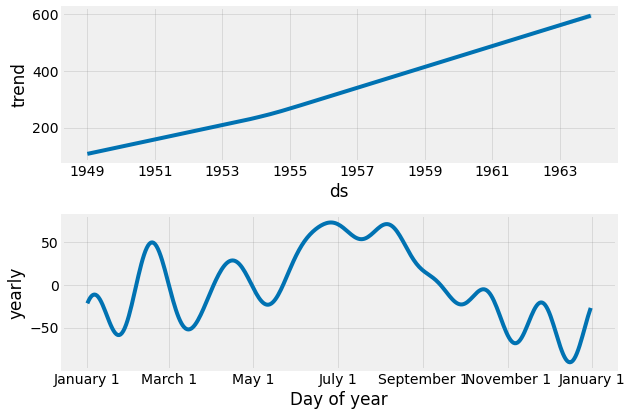

In [17]:
my_model.plot_components(forecast)

El gráfico anterior ofrece datos interesantes: 

- El primero muestra que el volumen mensual de pasajeros aéreos ha aumentado linealmente a lo largo del tiempo. 

- El segundo gráfico muestra que el número semanal de pasajeros alcanza su máximo al final de la semana y los sábados. 

- El tercer gráfico muestra que el mayor tráfico se produce durante los meses de vacaciones de julio y agosto.

**Trazado de los componentes pronosticados** <a class="anchor" id="7"></a>


 Podemos trazar la tendencia y la estacionalidad, componentes de la previsión, del siguiente modo:

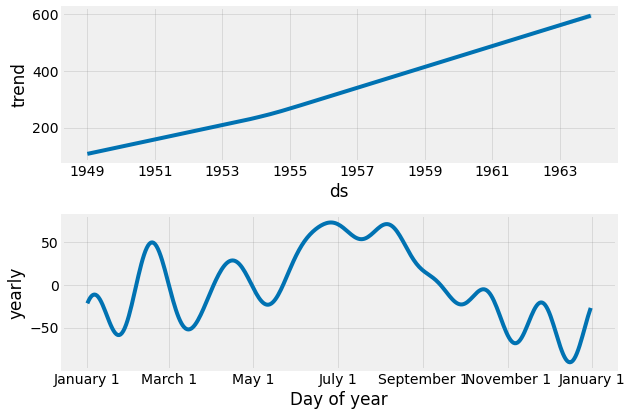

In [18]:
fig1 = my_model.plot_components(forecast)

**Añadir puntos de cambio a Prophet** <a class="anchor" id="8"></a>


- Los puntos de cambio son los puntos de fecha y hora en los que las series temporales presentan cambios bruscos en la trayectoria.

- Por defecto, Prophet añade 25 puntos de cambio al 80% inicial del conjunto de datos.

- Tracemos las líneas verticales donde se produjeron los posibles puntos de cambio.

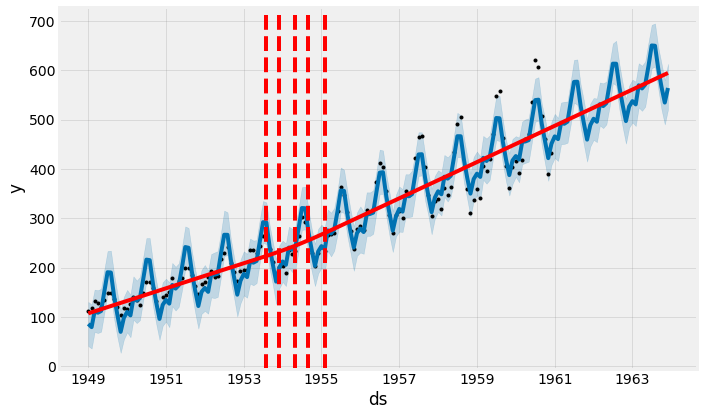

In [19]:
from fbprophet.plot import add_changepoints_to_plot
fig = my_model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), my_model, forecast)


Podemos ver las fechas en las que se produjeron los puntos de saltos.

In [20]:
my_model.changepoints

5     1949-06-01
9     1949-10-01
14    1950-03-01
18    1950-07-01
23    1950-12-01
27    1951-04-01
32    1951-09-01
36    1952-01-01
41    1952-06-01
46    1952-11-01
50    1953-03-01
55    1953-08-01
59    1953-12-01
64    1954-05-01
68    1954-09-01
73    1955-02-01
78    1955-07-01
82    1955-11-01
87    1956-04-01
91    1956-08-01
96    1957-01-01
100   1957-05-01
105   1957-10-01
109   1958-02-01
114   1958-07-01
Name: ds, dtype: datetime64[ns]

Podemos cambiar el rango del punto de cambio inferido ajustando el *rango_del_punto_de_cambio*.

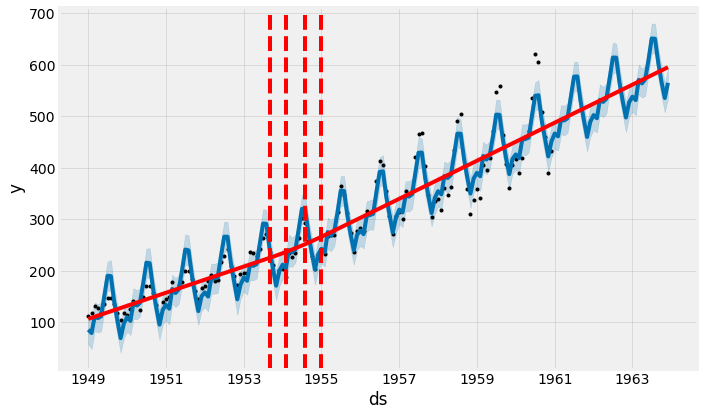

In [21]:
pro_change= Prophet(changepoint_range=0.9)
forecast = pro_change.fit(df).predict(future_dates)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)


El número de puntos de cambio puede establecerse utilizando el parámetro *n_changepoints* al inicializar prophet.

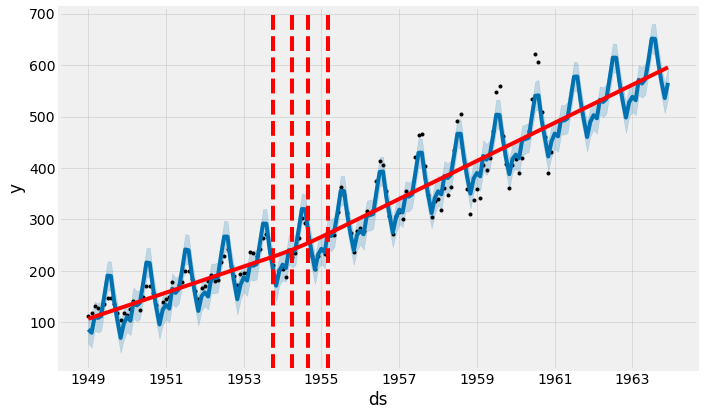

In [22]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True)
forecast = pro_change.fit(df).predict(future_dates)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

**Ajuste de la tendencia** <a class="anchor" id="9"></a>


- Prophet nos permite ajustar la tendencia en caso de que haya un ajuste excesivo o insuficiente. 

- *changepoint_prior_scale* ayuda a ajustar la fuerza de la tendencia.

- El valor por defecto de *changepoint_prior_scale* es 0.05. 

- Disminuya el valor para que la tendencia sea menos flexible. 

- Aumente el valor de *changepoint_prior_scale* para que la tendencia sea más flexible.

- Aumentar el valor de *changepoint_prior_scale* a 0.08 para que la tendencia sea flexible.



# 8. Visualización de datos
La capacidad de analizar grandes cantidades de datos y obtener información útil tiene poco valor si los únicos que pueden interpretar los resultados son los analistas.
La etapa de visualización de datos se dedica a utilizar técnicas y herramientas de visualización de datos para comunicar gráficamente los resultados del análisis con vistas a una interpretación eficaz por parte de los usuarios empresariales.

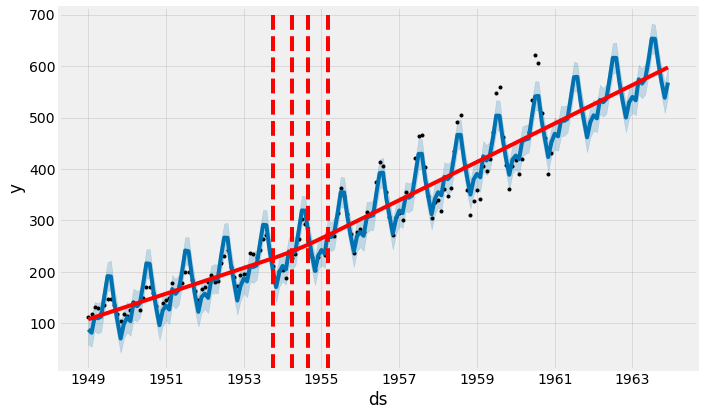

In [23]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True, changepoint_prior_scale=0.08)
forecast = pro_change.fit(df).predict(future_dates)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

Disminución de *changepoint_prior_scale* a 0,001 para que la tendencia sea menos flexible.

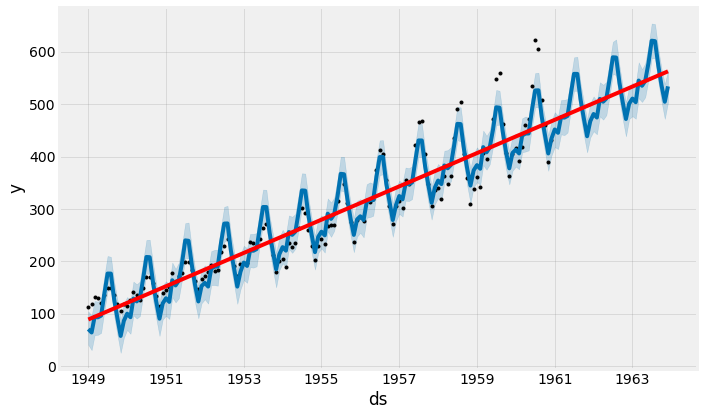

In [24]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True, changepoint_prior_scale=0.001)
forecast = pro_change.fit(df).predict(future_dates)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

# 9. Utilización de los resultados del análisis
Después de que los resultados del análisis se pongan a disposición de los usuarios de negocio para apoyar la toma de decisiones empresariales, por ejemplo a través de cuadros de mando o paneles, puede haber más oportunidades para utilizar los resultados del análisis. La etapa de utilización de los resultados del análisis, esta enfocada en determinar cómo y dónde se pueden aprovechar más los datos del análisis procesado.

**Conclusiones** <a class="anchor" id="10"></a>


- Hemos descrito cómo utilizar la biblioteca Prophet para realizar previsiones de series temporales en Python. 

- Hemos estado utilizando parámetros predefinidos, pero Prophet nos permite especificar muchos más argumentos. 

- En particular, Prophet proporciona la funcionalidad para traer su propio conocimiento acerca de las series de tiempo a un caso real.

# **Referencias** <a class="anchor" id="11"></a>


1. https://facebook.github.io/prophet/

2. https://facebook.github.io/prophet/docs/quick_start.html

3. https://peerj.com/preprints/3190.pdf

4. https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-prophet-in-python-3
